<a href="https://colab.research.google.com/github/sadavarterohit/EIBEC3-Diffusion/blob/main/TVAE-philly-sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas sdv openpyxl


In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv("/content/city_payments_sector_label_fy2017.csv", header=0)

# Drop the 'ID' column if present
if 'ID' in data.columns:
    data = data.drop(columns=['ID'])

print(data.shape)
data.head()



(238894, 18)


,Unnamed: 0,fy,fm,check_date,document_no,dept,department_title,char_,character_title,sub_obj,sub_obj_title,vendor_name,doc_ref_no_prefix,doc_ref_no_prefix_definition,contract_number,contract_description,transaction_amount,sector
0,0,2017,10,2017-04-12,CHEK17119771,42,42 COMMERCE,2,02 PURCHASE OF SERVICES,231,OVERTIME MEALS 0231,EAT AT JOE'S,PVXX,payment voucher,NaN,NaN,66.82,Accommodation and Food Services
1,1,2017,12,2017-06-09,ACHD17177233,26,26 LICENSES & INSPECTIONS,2,02 PURCHASE OF SERVICES,211,TRANSPORTATION 0211,L & I Â TRAVEL IMPREST FUND,PVXX,payment voucher,NaN,NaN,127.33,Unknown
2,2,2017,5,2016-11-25,CHEK17063736,44,44 LAW,2,02 PURCHASE OF SERVICES,258,COURT REPORTERS 0258,"MARLENE BELL REPORTING, INC.",PVXX,payment voucher,NaN,NaN,454.20,"Professional, Scientific, and Technical Services"
3,3,2017,1,2016-07-07,CHEK17000247,11,11 POLICE,2,02 PURCHASE OF SERVICES,260,REPAIR AND MAINTENANCE CHARGES 0260,RICOH AMERICAS CORPORATION,VCXX,procurement,NaN,NaN,50.00,Information
4,4,2017,1,2016-07-08,ACHD17000233,23,23 PRISONS,3,03 MATERIALS AND SUPPLIES,313,FOOD 0313,PHILADELPHIA PRISONS,PCXX,petty cash,NaN,NaN,71.92,Public Administration (government agencies and...


In [11]:
cat_attrs = ['fm', 'department_title', 'character_title', 'sub_obj_title', 'sector']
num_attrs = ['transaction_amount']
train = data[cat_attrs+num_attrs].copy()
train['fm'] = train['fm'].astype(str)

# Sample 100,000 rows from the cleaned dataset
train = train.sample(n=100000, random_state=42)
train

,fm,department_title,character_title,sub_obj_title,sector,transaction_amount
70142,12,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,Wholesale Trade,15.84
146071,5,44 LAW,02 PURCHASE OF SERVICES,COURT REPORTERS 0258,"Professional, Scientific, and Technical Services",202.25
154875,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,"Professional, Scientific, and Technical Services",250.00
154799,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,"Professional, Scientific, and Technical Services",150.00
228979,9,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,Wholesale Trade,16.96
...,...,...,...,...,...,...
195545,7,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,RENTS 0285,Information,242.48
218523,9,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,"Professional, Scientific, and Technical Services",250.00
199838,8,22 HUMAN SERVICES,02 PURCHASE OF SERVICES,RENTS 0285,Wholesale Trade,10.30
187750,7,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,Wholesale Trade,160.61


In [4]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=train)

# Optional: You can review the inferred metadata
metadata.to_dict()


{'columns': {'fm': {'sdtype': 'categorical'},
  'department_title': {'sdtype': 'categorical'},
  'character_title': {'sdtype': 'categorical'},
  'sub_obj_title': {'sdtype': 'categorical'},
  'sector': {'sdtype': 'categorical'},
  'transaction_amount': {'sdtype': 'numerical'}},
 'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1'}

In [5]:
from sdv.single_table import TVAESynthesizer

# Initialize synthesizer
tvae = TVAESynthesizer(metadata)

# Fit model on real data
tvae.fit(train)


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:123: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [120]:
# Generate synthetic samples (same size as original)
synthetic_data = tvae.sample(num_rows=len(train))

# Preview
print(synthetic_data.shape)
synthetic_data.head()


(100000, 6)


,fm,department_title,character_title,sub_obj_title,sector,transaction_amount
0,4,22 HUMAN SERVICES,02 PURCHASE OF SERVICES,PURCHASE SERVICESIMPREST ADVANCES 0295,Transportation and Warehousing,-1.52
1,6,28 WATER,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,"Professional, Scientific, and Technical Services",34697.22
2,9,44 LAW,03 MATERIALS AND SUPPLIES,OFFICE MATERIALS AND SUPPLIES 0320,Health Care and Social Assistance,1769.96
3,7,22 HUMAN SERVICES,02 PURCHASE OF SERVICES,PROFESSIONAL CONSULT/SPEC SERVICES 0250,Transportation and Warehousing,374.75
4,1,52 FREE LIBRARY,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,Retail Trade,306.64


In [121]:
synthetic_data.to_csv('phily_sector_tvae.csv')

import pickle

# Save the object to a pickle file
filename = 'phily_sector_tvae.pkl'
with open(filename, 'wb') as file:
    pickle.dump(tvae, file)

print(f"Object saved to {filename}")

Object saved to phily_sector_tvae.pkl


In [122]:
import sdv.evaluation.single_table as sdv_st
# generate quality report
quality_report = sdv_st.evaluate_quality(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 24.48it/s]|
Column Shapes Score: 89.46%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 26.52it/s]|
Column Pair Trends Score: 81.86%

Overall Score (Average): 85.66%



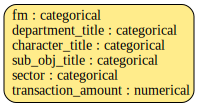

In [123]:
metadata.visualize()

In [124]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,fm,TVComplement,0.86439
1,department_title,TVComplement,0.85160
2,character_title,TVComplement,0.98492
3,sub_obj_title,TVComplement,0.79491
4,sector,TVComplement,0.95714
5,transaction_amount,KSComplement,0.91465


In [125]:
fig = quality_report.get_visualization(property_name='Column Pair Trends')
fig.show()

In [126]:
import sdv

for col in num_attrs:
  quality_report = sdv.evaluation.single_table.evaluate_quality(train, synthetic_data, metadata)
  fig = sdv.evaluation.single_table.get_column_plot(
      real_data=train,
      synthetic_data=synthetic_data,
      metadata=metadata,
      column_name=col
  )

  fig.show()

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 24.90it/s]|
Column Shapes Score: 89.46%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:00<00:00, 26.67it/s]|
Column Pair Trends Score: 81.82%

Overall Score (Average): 85.64%



In [127]:
from sdmetrics.single_column import BoundaryAdherence
from sdmetrics.single_column import RangeCoverage

for i in num_attrs:
    print(i +  " " +
    str(BoundaryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
       + ", RangeCoverage  " +
          str(RangeCoverage.compute(
              real_data=train[i],
        synthetic_data=synthetic_data[i]
          )) )

transaction_amount 1.0, RangeCoverage  0.024794070287849856


In [128]:
from sdmetrics.single_column import CategoryAdherence
from sdmetrics.single_column import CategoryCoverage

for i in cat_attrs:
    print(i +  " CategoryAdherence" +
    str(CategoryAdherence.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    ))
    + ", CategoryCoverage : " + str(CategoryCoverage.compute(
        real_data=train[i],
        synthetic_data=synthetic_data[i]
    )))


fm CategoryAdherence1.0, CategoryCoverage : 1.0
department_title CategoryAdherence1.0, CategoryCoverage : 0.9482758620689655
character_title CategoryAdherence1.0, CategoryCoverage : 1.0
sub_obj_title CategoryAdherence1.0, CategoryCoverage : 0.9238095238095239
sector CategoryAdherence1.0, CategoryCoverage : 0.9583333333333334


In [129]:
from sklearn.model_selection import train_test_split

test = data[cat_attrs+num_attrs].copy()
test['fm'] = test['fm'].astype(str)
test = test[~test.index.isin(train.index)]
for cat in cat_attrs:
    test = test[test[cat].isin(train[cat].unique())]
test = test.sample(n=30000, random_state=42)

In [130]:
'''
Compute Utility Score
'''

from sdmetrics.single_table import  LinearRegression

test_synthetic = test.copy()
for cat in cat_attrs:
    test_synthetic = test_synthetic[test_synthetic[cat].isin(synthetic_data[cat].unique())]
missed_cat_penalty =  test_synthetic.shape[0]/test.shape[0]

synthetic_data_r2 = LinearRegression.compute(
    test_data=test_synthetic,
    train_data=synthetic_data,
    target='transaction_amount',
    metadata=metadata.to_dict()
)

real_data_r2 = LinearRegression.compute(
    test_data=test,
    train_data=train,
    target='transaction_amount',
    metadata=metadata.to_dict()
)

print(f'Utility Score: {min(synthetic_data_r2*missed_cat_penalty/real_data_r2 , 1)}')

Utility Score: 0.025716670108788236


In [21]:
train

,fm,department_title,character_title,sub_obj_title,sector,transaction_amount
70142,12,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,Wholesale Trade,15.84
146071,5,44 LAW,02 PURCHASE OF SERVICES,COURT REPORTERS 0258,"Professional, Scientific, and Technical Services",202.25
154875,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,"Professional, Scientific, and Technical Services",250.00
154799,5,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,"Professional, Scientific, and Technical Services",150.00
228979,9,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,Wholesale Trade,16.96
...,...,...,...,...,...,...
195545,7,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,RENTS 0285,Information,242.48
218523,9,10 MANAGING DIRECTOR,02 PURCHASE OF SERVICES,LEGAL SERVICES 0253,"Professional, Scientific, and Technical Services",250.00
199838,8,22 HUMAN SERVICES,02 PURCHASE OF SERVICES,RENTS 0285,Wholesale Trade,10.30
187750,7,25 FLEET MANAGEMENT,03 MATERIALS AND SUPPLIES,MOTOR VEHICLE PARTS AND ACCESSORIES 0328,Wholesale Trade,160.61


In [88]:
from sdmetrics.single_table import DCRBaselineProtection

privacy = DCRBaselineProtection.compute_breakdown(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    num_rows_subsample = 100,
    num_iterations =50
)
print(f'Privacy Score: {privacy["score"]}')

Privacy Score: 0.45072834320743604


In [90]:
from sdmetrics.single_table import NewRowSynthesis

NewRowSynthesis.compute(
    real_data=train,
    synthetic_data=synthetic_data,
    metadata=metadata.to_dict(),
    numerical_match_tolerance=0.01,
    synthetic_sample_size=3000
)

0.823